# Business case: Yulu - Hypothesis Testing

Yulu Biking is a pioneering and innovative solution in the realm of urban mobility, revolutionizing the way people navigate the bustling streets of today's cities. Founded with a vision to promote sustainable and eco-friendly transportation, Yulu Biking has swiftly gained recognition as a leading micro-mobility platform, offering a unique and convenient way for people to move around urban landscapes.

With a focus on reducing traffic congestion, lowering carbon emissions, and enhancing the quality of life in cities, Yulu Biking introduces an exciting concept in shared transportation. The company provides a fleet of smart, dockless bicycles and electric scooters that are readily accessible through a user-friendly smartphone app. This approach empowers individuals to make quick, eco-conscious choices for their daily commutes and short-distance trips.

Yulu stands as the foremost micro-mobility service provider in India, offering distinctive commuting solutions for everyday travel needs. Originating with a clear mission to alleviate traffic congestion in India, Yulu presents a secure commuting alternative through an easy-to-use mobile application, promoting shared, individual, and eco-friendly travel options.

Yulu serves as a tech-driven mobility platform rooted in India, facilitating the seamless integration of various transportation modes, both public and private. Established in 2017, its headquarters are situated in Bengaluru.

### Importing Libraries

In [311]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import kruskal
from statsmodels.graphics.gofplots import qqplot

### Reading File

In [312]:
df = pd.read_csv("yulu_data_set.txt")
df

datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        81     0.0000       3          13     16  
1      13.635        80     0.0000       8          32     40  
2      13.635        80     0.0000       5          27     32  
3      14.395        75     0.0000       3          10     13  
4      14.395        75     0.0000       0           1      1  
...       ...       ...        ...     ...         ...    ...  
10881  19.695        50    26.0027       7         329    336  
10882  17.425        57    15.0013      10         231    241  
10883  15.910        61    15.0013       4         164    168  
10884  17.425        61     6.0032      12         117    129  
10885  16.665        66     8.9981       4          84     88  

[10886 rows x 12 columns]

### Shape of the Data

In [313]:
df.shape

(10886, 12)

### Total size of Data

In [314]:
df.size

130632

### Information of Data Including Data type

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### Checking Null values

In [316]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [317]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


### Description of Data

In [319]:
df.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [320]:
df.rename(columns={"season": "season_mode","atemp":"felling_temp","casual":"casual_count","count":"total_count","registered":"registered_count"}, inplace=True)

In [321]:
df['season_mode'].unique()

array([1, 2, 3, 4], dtype=int64)

season Mode:
    1: spring
        2: summer
            3: fall
                4: winter

In [322]:
df['weather'].unique()

array([1, 2, 3, 4], dtype=int64)

### weather description for 1,2,3,4

1: Clear, Few clouds, partly cloudy, partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [323]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

Insights: The table appears to represent a distribution of customers across different tiers or categories. The majority of customers fall into the first tier (7192) which has a clear attention in the respect to the weather, while there are significantly fewer in the second (2834) where the some what when the cloudy seen is appearing then the customer fall into the less attribute to be choosen and even fewer in the third tier (859) represents the thunder light, thunder storm and other effective significance . There's also a fourth tier with only one customer, which may warrant special attention. This distribution suggests that the business may want to focus on strategies to attract more customers to the second and third tiers and possibly investigate why there's only one customer in the fourth tier to improve customer engagement and retention.

### Percentage amongst the weather effects

In [324]:
df['weather'].value_counts()/df.shape[0]*100

1    66.066507
2    26.033437
3     7.890869
4     0.009186
Name: weather, dtype: float64

Inisghts: The table likely represents weather conditions categorized into four levels. Most frequently, the weather is clear or partly cloudy (66.07%), followed by misty or cloudy conditions (26.03%). Light snow or scattered rain with clouds occur less frequently (7.89%), and severe weather conditions like heavy rain with thunderstorms or snow and fog are exceptionally rare (0.009%). These insights are crucial for businesses reliant on weather conditions, where the people more likely to involve whent he event occured in the weather signifies where the transporatation level is been very clear when the event is clear.

In [325]:
df.head()

datetime  season_mode  holiday  workingday  weather  temp  \
0 2011-01-01 00:00:00            1        0           0        1  9.84   
1 2011-01-01 01:00:00            1        0           0        1  9.02   
2 2011-01-01 02:00:00            1        0           0        1  9.02   
3 2011-01-01 03:00:00            1        0           0        1  9.84   
4 2011-01-01 04:00:00            1        0           0        1  9.84   

   felling_temp  humidity  windspeed  casual_count  registered_count  \
0        14.395        81        0.0             3                13   
1        13.635        80        0.0             8                32   
2        13.635        80        0.0             5                27   
3        14.395        75        0.0             3                10   
4        14.395        75        0.0             0                 1   

   total_count  
0           16  
1           40  
2           32  
3           13  
4            1

In [326]:
df['datetime'].min(), df['datetime'].max()

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-12-19 23:00:00'))

we are having a 2 years of data starting from 2011-01-01 and ending as 2012-12-19

In [327]:
df['holiday'].unique()

array([0, 1], dtype=int64)

Snippet: 0 --> Holoiday
         1 --> Working Day

In [328]:
df['holiday'].value_counts(normalize=True)*100

0    97.14312
1     2.85688
Name: holiday, dtype: float64

In [329]:
df['workingday'].unique()

array([0, 1], dtype=int64)

Day is neither weekend nor holiday is 1
Holiday and weekend is representing as 0.

In [330]:
df['workingday'].value_counts()/df.shape[0]*100

1    68.087452
0    31.912548
Name: workingday, dtype: float64

The table indicates that the majority of the time (68.09%) corresponds to working days, while holidays and weekends account for the remaining time (31.91%). This insight is valuable for businesses scheduling operations, staffing, and service availability, ensuring resources are appropriately allocated for both regular workdays and leisure periods.

In [331]:
df[:2]

datetime  season_mode  holiday  workingday  weather  temp  \
0 2011-01-01 00:00:00            1        0           0        1  9.84   
1 2011-01-01 01:00:00            1        0           0        1  9.02   

   felling_temp  humidity  windspeed  casual_count  registered_count  \
0        14.395        81        0.0             3                13   
1        13.635        80        0.0             8                32   

   total_count  
0           16  
1           40

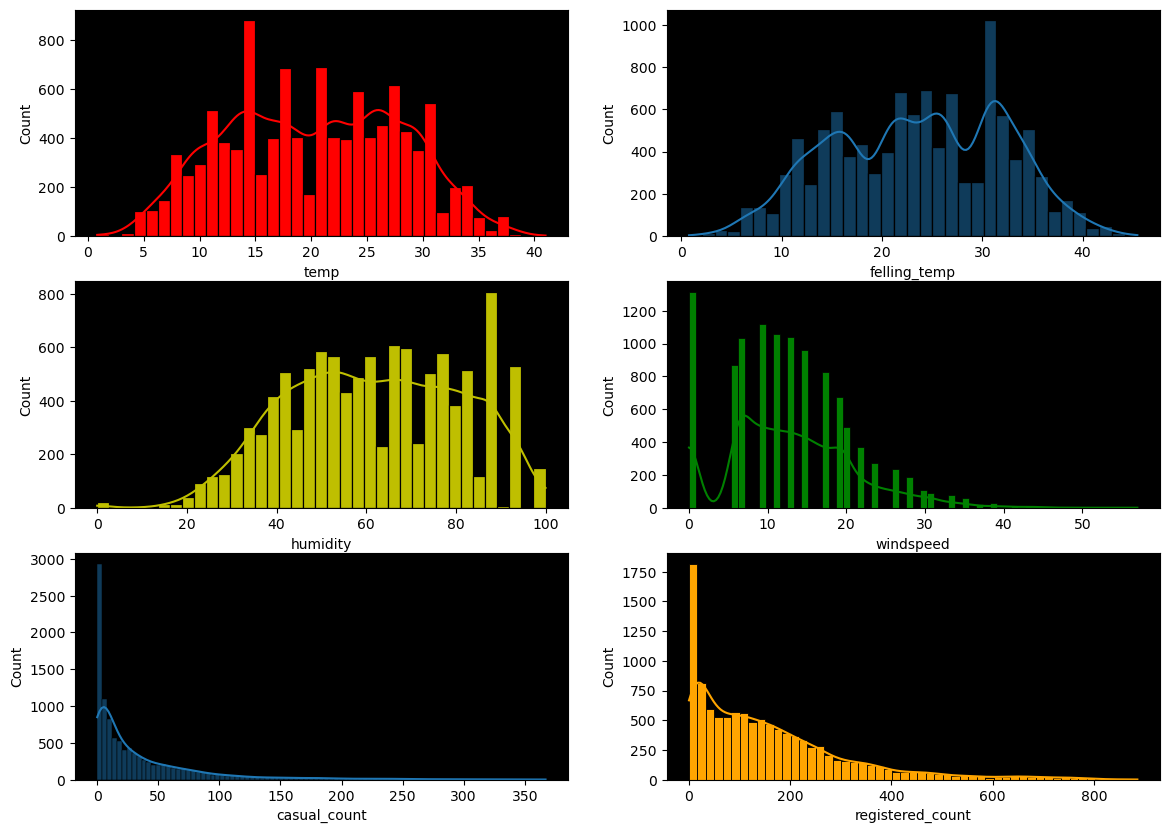

In [332]:
plt.figure(figsize=(14, 10))
plt.subplot(3,2,1)
sns.histplot(data=df, x='temp',kde=True,fc='red')
ax=plt.gca()
ax.set_facecolor('black')
plt.subplot(3,2,2)
sns.histplot(data=df, x='felling_temp',kde=True)
ax=plt.gca()
ax.set_facecolor('black')
plt.subplot(3,2,3)
sns.histplot(data=df, x='humidity',kde=True,fc='y')
ax=plt.gca()
ax.set_facecolor('black')
plt.subplot(3,2,4)
sns.histplot(data=df, x='windspeed',kde=True,fc='g')
ax=plt.gca()
ax.set_facecolor('black')
plt.subplot(3,2,5)
sns.histplot(data=df, x='casual_count',kde=True)
ax=plt.gca()
ax.set_facecolor('black')
plt.subplot(3,2,6)
sns.histplot(data=df, x='registered_count',kde=True,fc='orange')
ax=plt.gca()
ax.set_facecolor('black')
plt.show()

Insights: The provided data highlights distinct patterns within the dataset. It appears that the individual characteristics of "feeling temperature" and "temperature" vary noticeably. Additionally, "humidity" demonstrates a relatively consistent trend with a higher frequency of values. In contrast, "windspeed" exhibits a more favorable reflection in terms of its nature and distribution within the dataset.

### Bivariate Analysis on Season based on Weather

In [333]:
df_corss = pd.crosstab(index=df['season_mode'],columns=df['weather'])
df_corss = df_corss.rename({1:"Spring",2:"Summer",3:"Fall",4:"Winter"})
df_corss

weather         1    2    3  4
season_mode                   
Spring       1759  715  211  1
Summer       1801  708  224  0
Fall         1930  604  199  0
Winter       1702  807  225  0

The table appears to represent weather conditions (1, 2, 3, 4) categorized by different seasonal modes (Spring, Summer, Fall, Winter). Here are some business insights:

1.Seasonal Variation: Different seasons exhibit varying weather patterns. For instance, Spring and Fall have similar weather distribution, while Summer tends to have slightly more of condition 1, and Winter has more of condition 2.

2.Rare Events: In all seasons, condition Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog (possibly severe weather) is rare, occurring only once in Spring and not at all in other seasons.

3.Data Validation: The table helps in validating and verifying weather data for different seasons, which can be crucial for businesses reliant on accurate weather information for planning and decision-making.

4.Preparedness: Businesses in regions with specific weather-related concerns can use this data to prepare and allocate resources accordingly during each season. For example, a yulu company might need more resources as bikes rentals during Summer when condition  Clear, Few clouds, partly cloudy, partly cloudy is more frequent.

5.Potential Anomalies: The absence of condition Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog in most seasons could indicate data anomalies or extremely rare events, warranting further investigation and quality assurance.

C:\Users\HP\AppData\Local\Temp\ipykernel_10980\2726080383.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='coolwarm', linewidths=1,linecolor='purple',square=False)


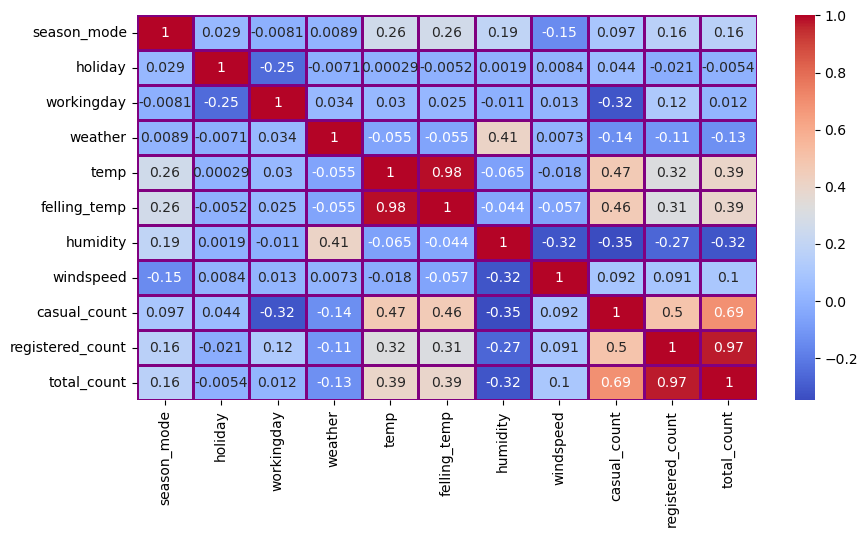

In [334]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm', linewidths=1,linecolor='purple',square=False)
plt.show()

Insights: The correlation analysis above provides insight into the relationships between the columns, highlighting both strong and weak interactions. Notably, there is a strong correlation between "feeling temperature" and "temperature," while the remaining columns demonstrate weaker relationships. In summary, the data does not exhibit a universally strong and positive correlation among all the columns.

In [335]:
df[:1]

datetime  season_mode  holiday  workingday  weather  temp  felling_temp  \
0 2011-01-01            1        0           0        1  9.84        14.395   

   humidity  windspeed  casual_count  registered_count  total_count  
0        81        0.0             3                13           16

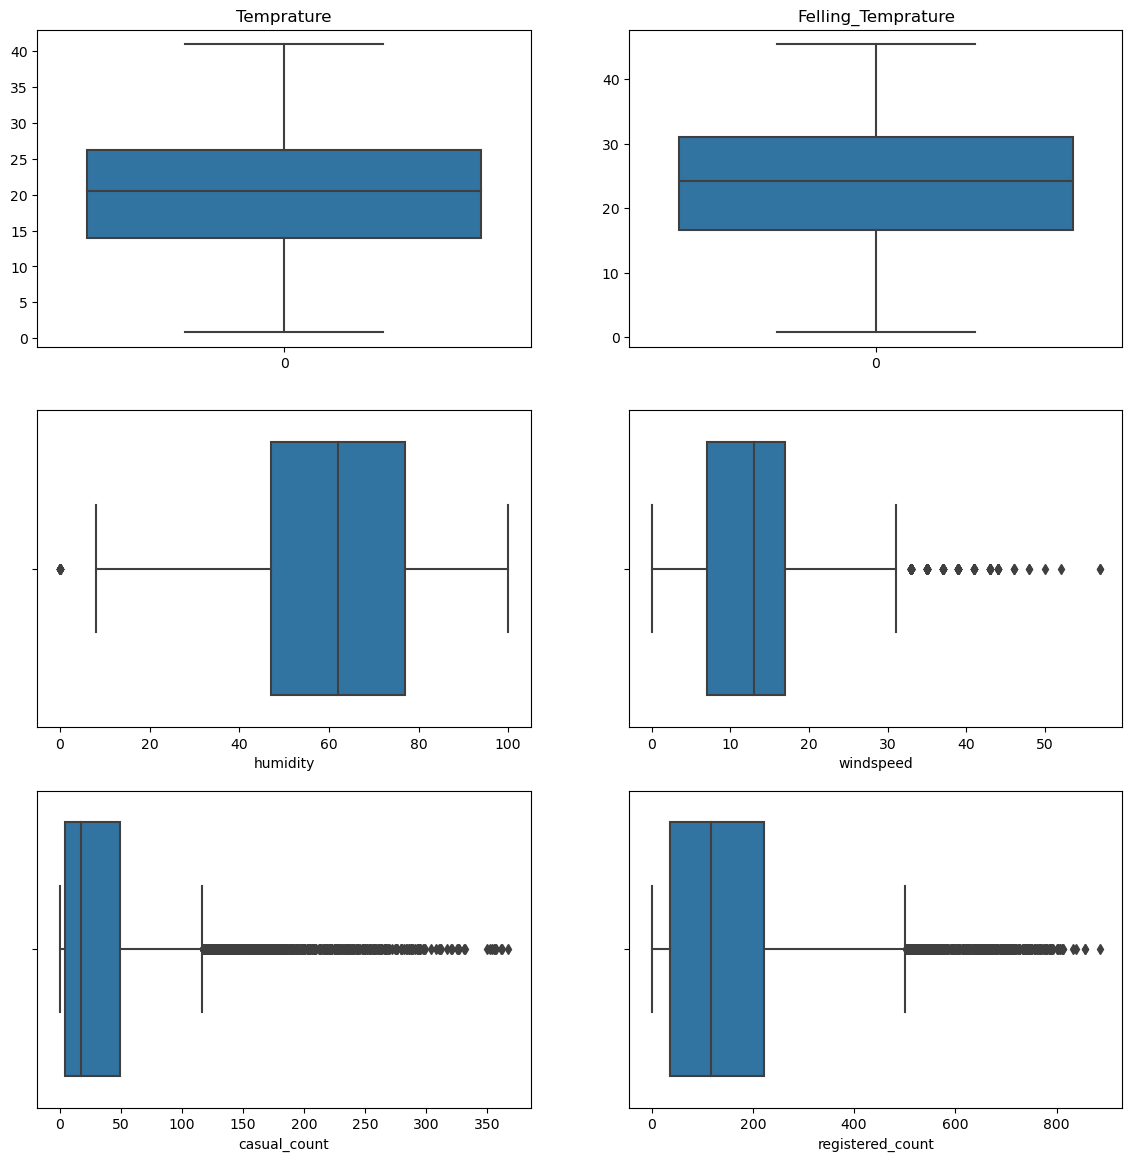

In [336]:
plt.figure(figsize=(14, 14))
plt.subplot(3,2,1)
sns.boxplot(df['temp'])
plt.title("Temprature")
plt.subplot(3,2,2)
sns.boxplot(df['felling_temp'])
plt.title("Felling_Temprature")
plt.subplot(3,2,3)
sns.boxplot(x=df['humidity'])
plt.subplot(3,2,4)
sns.boxplot(x=df['windspeed'])
plt.subplot(3,2,5)
sns.boxplot(x=df['casual_count'])
plt.subplot(3,2,6)
sns.boxplot(x=df['registered_count'])
plt.show()

Insights: Observations indicate that "Temperature" and "Feeling Temperature" have nearly identical medians. However, the Interquartile Range (IQR) for "Feeling Temperature" is notably broader compared to "Temperature."

In terms of "Humidity," values predominantly fall within the range of 45 to 80, whereas "Wind Speed" tends to cluster between 9 to 15.

Regarding the "Casual Count" and "Registered Count," "Casual Count" exhibits a smaller IQR, whereas "Registered Count" displays a wider range. Additionally, it's worth noting that a significant portion of data points for both counts are classified as outliers, suggesting that individuals using the bike-sharing service, whether casual or registered users, are not consistently adhering to typical bike usage patterns.

In [388]:
humidity = df[df['humidity']>55]
humidity[['humidity','windspeed']]

humidity  windspeed
0            81     0.0000
1            80     0.0000
2            80     0.0000
3            75     0.0000
4            75     0.0000
...         ...        ...
10872        70     7.0015
10882        57    15.0013
10883        61    15.0013
10884        61     6.0032
10885        66     8.9981

[6545 rows x 2 columns]

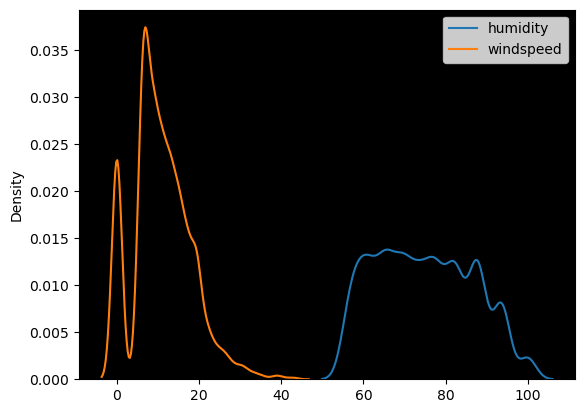

In [397]:
sns.kdeplot(humidity[['humidity','windspeed']])
ax=plt.gca()
ax.set_facecolor('black')
plt.show()

Insights: According to the aforementioned Kde plot, there is no relationship between the windshear and humidity because each plays an independent part in its own right, but the density plays a greater role than the humidity does.

Business ionsights: Based on the provided KDE plot analysis, it appears that there is no significant correlation between windshear and humidity. These two factors seem to influence outcomes independently. However, it's worth noting that density has a more pronounced impact on the outcome compared to humidity. This insight suggests that when considering factors affecting the outcome, density should be a more significant focus than humidity, which plays a comparatively smaller role.

# Hypothesis testing for Season and Weather

Null Hypotheis(Ho): Season has no effect on weather(Independent)
Alternative Hypothesis(Ha): Season has an effcet on weather (dependent)

In [337]:
df['season_mode'].unique()

array([1, 2, 3, 4], dtype=int64)

In [338]:
df['weather'].unique()

array([1, 2, 3, 4], dtype=int64)

In [339]:
data_weather = pd.crosstab(index=df['season_mode'],columns=['weather'])
data_weather

col_0        weather
season_mode         
1               2686
2               2733
3               2733
4               2734

In [340]:
from scipy.stats import chi2_contingency
statistic,pvalue,dof,expf =chi2_contingency(pd.crosstab(index=df['season_mode'],columns=['weather']))
print("statistic=",statistic)
print("pvalue=",pvalue)
print("dof=",dof)
print("expf=",expf)
alpha = 0.05
if pvalue< alpha:
    print("Reject the null Hypothesis at:",pvalue)
else:
    print("Failed to reject the Null hypothesis at:",pvalue)

statistic= 0.0
pvalue= 1.0
dof= 0
expf= [[2686.]
 [2733.]
 [2733.]
 [2734.]]
Failed to reject the Null hypothesis at: 1.0


Since the Pvalue is greater than alpha, we were unable to reject the null hypothesis in this case, and as a result, we may conclude from this test that neither the season nor the weather had any bearing on outcomes.

## Hypothesis testing working Day

Null Hypothesis(Ho): Working Day has a no effect on number of electric cycles rented.
Alternative Hypothesis(Ha): Working Day has effect on number of electric cycles rented.
Significance level (alpha): 0.05

In [341]:
df['workingday'].unique()

array([0, 1], dtype=int64)

In [342]:
data1 = df[df['workingday']==0]['total_count'].values
data1

array([ 16,  40,  32, ..., 106,  89,  33], dtype=int64)

In [343]:
data2=df[df['workingday']==1]['total_count'].values
data2

array([  5,   2,   1, ..., 168, 129,  88], dtype=int64)

In [344]:
from scipy.stats import ttest_ind

In [345]:
statistic, pvalue = ttest_ind(data1,data2)
print("statistic =",statistic)
print("pvalue =",pvalue)
alpha =0.05
if pvalue < alpha:
    print('Reject the Null hypothesis at:',pvalue)
else:
    print('Failed to Reject the null hypothesis at:',pvalue)

statistic = -1.2096277376026694
pvalue = 0.22644804226361348
Failed to Reject the null hypothesis at: 0.22644804226361348


Since the pvalue is more than 0.05, the null hypothesis cannot be rejected. We lack sufficient data to conclusively state that working days affect the amount of cycles hired.
Also, from the data we conclude that working day has no effect on the electric cycles Rented.

## Hypothesis testing Weather

Null Hypothesis(Ho):  Number of cycles rented is similar in different weather.
Alternative Hypotheis (Ha):  Number of cycles rented is not similar in different weather. 

In [346]:
df['weather'].unique()

array([1, 2, 3, 4], dtype=int64)

In [347]:
w1 = df[df['weather'] == 1]['total_count'].values
w1

array([ 16,  40,  32, ..., 168, 129,  88], dtype=int64)

In [348]:
w2 = df[df['weather'] == 2]['total_count'].values
w2

array([  1,  94, 106, ...,  18,  15,   7], dtype=int64)

In [349]:
w3 = df[df['weather'] == 3]['total_count'].values
w3

array([ 35,  37,   2,   8,  59,  74,  76,   5,   7,   1,  15,  20,  95,
        51,  32,  20,  29,  19,  60,  33,  27,  13,   4,   7,   3,   2,
         3,  22,  52, 135,  16,   2,   3,   4,   1,   1,   3,  18,  49,
       155,   8,   9,   4,   4,  10,  20,  34,  47,  52,  72,  55,  60,
        71,   1,  88,  84,  46,  37,  16,   7,   3,   5,  39,   7,  11,
        25,  23,  11,  11,   7,   4,   2,  21,  18,   3,   2,   1,   3,
        12,  37,  44,  24,  17,  11,  34,  12,  12,  14,  21,  82,  56,
        38,  28,  27,   8,   5,  55,   8,   3,   6,   4,   7,  12,  28,
        95, 184, 190, 136,  79,  15,   2,   5, 157,  46,  28,  19,  13,
         1, 113, 221,  80,  42,  15,  25, 148,  62,  53,  14,   3,  54,
       226,  54,  40, 106, 291, 224,   2,   2,   3,   5,  34,  70, 164,
        95,  10,  45,  29,  22,  31,  58,  63,  78,  33,  15,  53,  24,
       162,  27,   7,   4,   1,   3,   9,  21,  52,  79,  40, 470, 292,
       378, 351,   5,  82, 157, 491, 398, 119,  32,  88, 279, 24

In [350]:
w4 = df[df['weather'] == 4]['total_count'].values
w4

array([164], dtype=int64)

Significance level (alpha): 0.05
Here, we will use the ANOVA to test the hypothess defined above beacause we have more than 2 categorical independent values category.

In [351]:
from scipy.stats import f_oneway
statistic,pvalue = f_oneway(w1,w2,w3,w4)
print("statistic =",statistic)
print("pvalue",pvalue)
alpha = 0.05
if pvalue < alpha:
    print("Reject the Null hypotheis at:",pvalue)
else:
    print("Failed to Reject the Null hypotheis at:",pvalue)

statistic = 65.53024112793271
pvalue 5.482069475935669e-42
Reject the Null hypotheis at: 5.482069475935669e-42


Conclusion: Since the Pvalues is far less than the alpha value, so there is no significant telation between the Rented cycle is not similar to the weather.

## Hypothesis testing Season

Null Hypohthesis(Ho):  Number of cycles rented is similar or different Season.
Alternative Hypotheis (Ha):  Number of cycles rented is  not similar or different Season.

In [352]:
df['season_mode'].unique()

array([1, 2, 3, 4], dtype=int64)

In [353]:
s1 = df[df['season_mode'] == 1]['total_count'].values
s2 = df[df['season_mode'] == 2]['total_count'].values
s3 = df[df['season_mode'] == 3]['total_count'].values
s4 = df[df['season_mode'] == 4]['total_count'].values

In [354]:
s1,s2,s3,s4

(array([ 16,  40,  32, ..., 223, 148,  54], dtype=int64),
 array([  6,   4,   7, ..., 276, 291, 125], dtype=int64),
 array([ 68,  31,  13, ..., 349, 229, 123], dtype=int64),
 array([130,  58,  67, ..., 168, 129,  88], dtype=int64))

Significance level (alpha): 0.05
Here, we will use the ANOVA to test the hypothess defined above because we have more than 2 categorical independent values category.

In [355]:
from scipy.stats import f_oneway
statistic,pvalue = f_oneway(s1,s2,s3,s4)
print("statistic =",statistic)
print("pvalue",pvalue)
alpha = 0.05
if pvalue < alpha:
    print("Reject the Null hypotheis at:",pvalue)
else:
    print("Failed to Reject the Null hypotheis at:",pvalue)

statistic = 236.94671081032106
pvalue 6.164843386499654e-149
Reject the Null hypotheis at: 6.164843386499654e-149


Conclusion: Since the Pvalues are much lower than the alpha value, there is no discernible relationship between the Rented cycle and the Season.
Also we can conclude the number of rented cycles are not similar or different in seasons.

### Alternate Hypotheis testing for Kruskal's (Season)

Null Hypothesis (Ho): No of cycle rented is similar in different weather and season conditions
Alternate Hypothesis (Ha): No of cycle rented is not similar in different weather and season conditions

In [356]:
s1,s2,s3,s4

(array([ 16,  40,  32, ..., 223, 148,  54], dtype=int64),
 array([  6,   4,   7, ..., 276, 291, 125], dtype=int64),
 array([ 68,  31,  13, ..., 349, 229, 123], dtype=int64),
 array([130,  58,  67, ..., 168, 129,  88], dtype=int64))

In [357]:
statistic,pvalue = kruskal(s1,s2,s3,s4)
print("statistic =",statistic)
print("pvalue",pvalue)
alpha = 0.05
if pvalue < alpha:
    print("Reject the Null hypotheis at:",pvalue)
else:
    print("Failed to Reject the Null hypotheis at:",pvalue)

statistic = 699.6668548181988
pvalue 2.479008372608633e-151
Reject the Null hypotheis at: 2.479008372608633e-151


Conclusion: we get the pvalue as far less than the alpha value, so here we reject the Ho saying with the conclusion that from the condition with the weather keeping hand with the cycles rented are not similar.

###  Alternate Hypotheis testing for Kruskal's (Weather)

In [358]:
w1,w2,w3,w4

(array([ 16,  40,  32, ..., 168, 129,  88], dtype=int64),
 array([  1,  94, 106, ...,  18,  15,   7], dtype=int64),
 array([ 35,  37,   2,   8,  59,  74,  76,   5,   7,   1,  15,  20,  95,
         51,  32,  20,  29,  19,  60,  33,  27,  13,   4,   7,   3,   2,
          3,  22,  52, 135,  16,   2,   3,   4,   1,   1,   3,  18,  49,
        155,   8,   9,   4,   4,  10,  20,  34,  47,  52,  72,  55,  60,
         71,   1,  88,  84,  46,  37,  16,   7,   3,   5,  39,   7,  11,
         25,  23,  11,  11,   7,   4,   2,  21,  18,   3,   2,   1,   3,
         12,  37,  44,  24,  17,  11,  34,  12,  12,  14,  21,  82,  56,
         38,  28,  27,   8,   5,  55,   8,   3,   6,   4,   7,  12,  28,
         95, 184, 190, 136,  79,  15,   2,   5, 157,  46,  28,  19,  13,
          1, 113, 221,  80,  42,  15,  25, 148,  62,  53,  14,   3,  54,
        226,  54,  40, 106, 291, 224,   2,   2,   3,   5,  34,  70, 164,
         95,  10,  45,  29,  22,  31,  58,  63,  78,  33,  15,  53,  24,
        

In [359]:
statistic,pvalue = kruskal(w1,w2,w3,w4)
print("statistic =",statistic)
print("pvalue",pvalue)
alpha = 0.05
if pvalue < alpha:
    print("Reject the Null hypotheis at:",pvalue)
else:
    print("Failed to Reject the Null hypotheis at:",pvalue)

statistic = 205.00216514479087
pvalue 3.501611300708679e-44
Reject the Null hypotheis at: 3.501611300708679e-44


Conclusion: We reject the Ho assertion here by coming to the conclusion that the conditions associated with the weather keeping hand with the rented cycles are not comparable because we obtain the pvalue as being significantly less than the alpha value or the data is not enough to conclude with the difference in the rented cycles.

## Hypothesis testing temp and feeling temp

Null Hypothesis(Ho): Temp and feeling Temp are same
Alternative Hypothesis(Ha): Temp and feeling Temp are different

In [360]:
temp = df['temp'].values
temp

array([ 9.84,  9.02,  9.02, ..., 13.94, 13.94, 13.12])

In [361]:
ftemp =df['felling_temp'].values
ftemp

array([14.395, 13.635, 13.635, ..., 15.91 , 17.425, 16.665])

Significance level (alpha): 0.05
so, we were having the 2 categorical values but they are relative to each other, here we use the ttest_rel for testing with significance valuw at 0.05 with 95%

In [362]:
from scipy.stats import ttest_rel
stats,pvalue= ttest_rel(ftemp,temp)
print("statistic:",statistic)
print("pvalue",pvalue)
alpha = 0.05
if pvalue < alpha:
    print("Reject the Null Hypothesis at:",pvalue)
else:
    print("Failed to Reject the Null hypothesis at",pvalue)

statistic: 205.00216514479087
pvalue 0.0
Reject the Null Hypothesis at: 0.0


Since we have the pvalue is less than the alpha then null hypothesis will be rejected, and we conclude that the Temp and felling temp are different.

### Characterising QQ Plot Relationship in season

In [363]:
season_1 = df[df['season_mode']==1]['total_count']

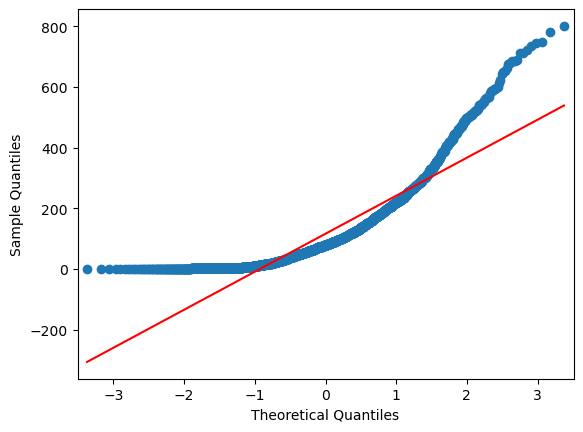

In [364]:
qqplot(season_1, line='s')
plt.show()

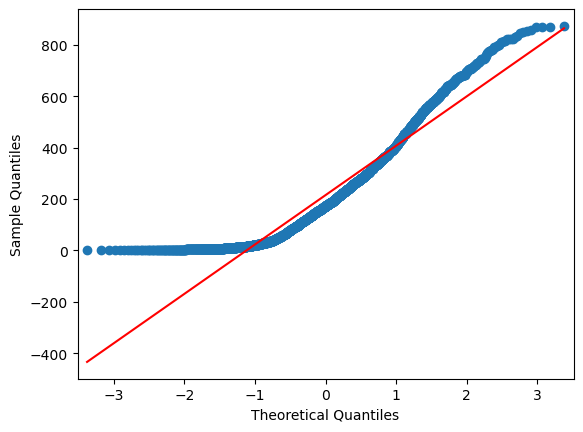

In [365]:
qqplot(df[df['season_mode']==2]['total_count'],line='s')
plt.show()

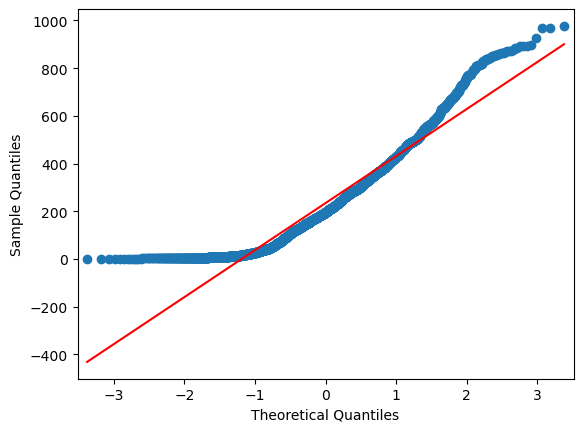

In [366]:
qqplot(df[df['season_mode']==3]['total_count'],line='s')
plt.show()

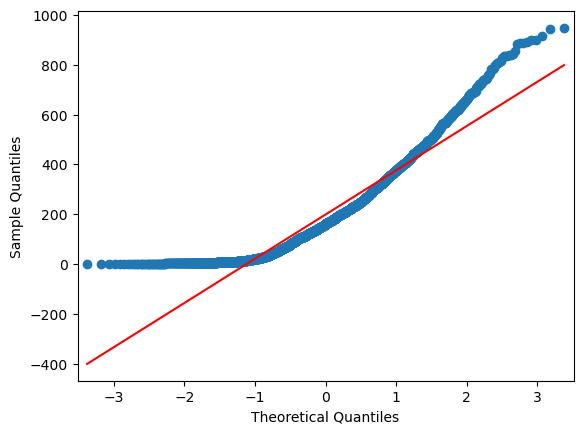

In [367]:
qqplot(df[df['season_mode']==4]['total_count'],line='s')
plt.show()

### Characterising QQ Plot Relationship in weather

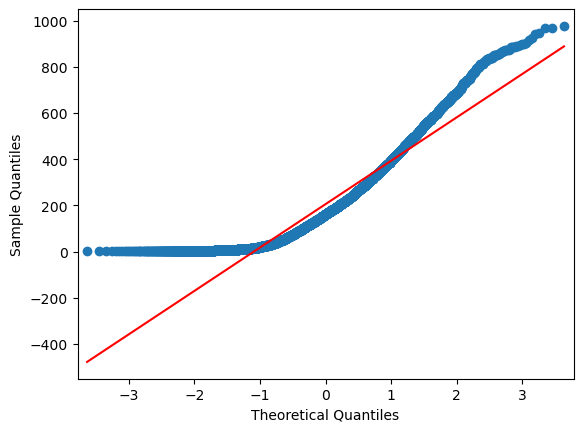

In [368]:
qqplot(df[df['weather']==1]['total_count'],line='s')
plt.show()

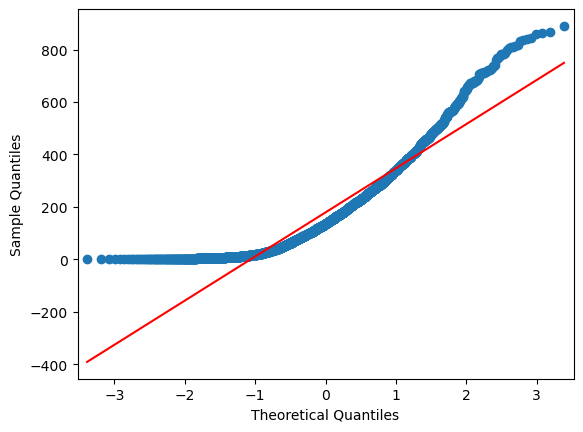

In [369]:
qqplot(df[df['weather']==2]['total_count'],line='s')
plt.show()

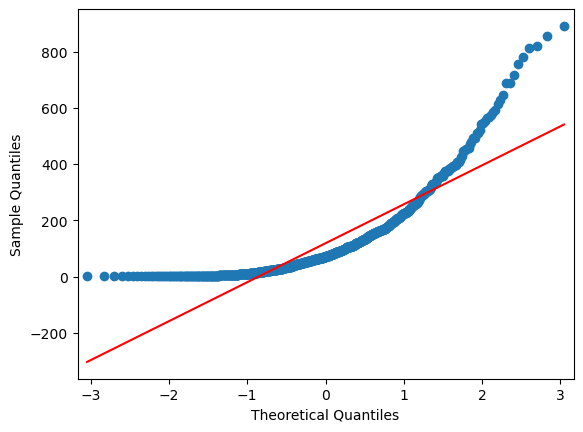

In [370]:
qqplot(df[df['weather']==3]['total_count'],line='s')
plt.show()

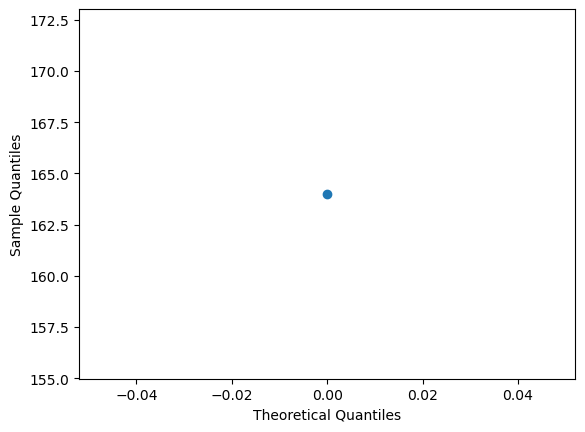

In [371]:
qqplot(df[df['weather']==4]['total_count'],line='s')
plt.show()

Conclusion: The blue line in all of the aforementioned charts is not completely parallel to the red straight line, indicating that the data does not follow the normal distribution.
According to weather 4, the "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog" conclusion has only one piece of data, which does not provide the ideal conclusion for the QQ plot scenario.s

### Conclusion

Time, temperature, sensation temperature, and humunity are the most pertinent cycle demand parameters.
Most popular hours are from 16 to 19 hours.
The most frequently requested temperature cycles are 28.70, 26.24, and 29.52 celsius.

The temperature cycles with the greatest demand are 31.06, 32.57, and 33.33 celsius.

The 46, 55, and 49 humidity cycles are the most popular.

The biggest number of cycles are rented during the rainy season, with considerable seasonal differences.
Cycle rentals vary significantly by weather, with the most being booked in Clear. There aren't many clouds, and the sky is mostly cloudy.

The choice between renting electric bikes during the day and not makes little difference.
There is no obvious connection between the season and the weather.

## Recommendations

The business should have more rental bikes available in the summer and fall  because certain seasons have greater demand than other seasons.

Workingday had no effect on the quantity of bikes hired at a significance level of 0.05.

The company should have fewer bikes available for rent on days with exceptionally low humidity.

The company should have fewer bikes on days that are really chilly or when the temperature is below 10.

When the wind is blowing more than 35 mph or when there are thunderstorms, the rental bike firm should have fewer bikes available.